In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/global/homes/e/ecastori/PostBorn/'

In [3]:
data = np.loadtxt(path+'FFT_k-1Pk.dat',skiprows=2)

#----------------------#
n         = data[:,0]
Re_c_n    = data[:,1]
Im_c_n    = data[:,2]
Re_nu_n   = data[:,3]
Im_nu_n   = data[:,4]
#----------------------#

c_n  = Re_c_n  + 1j * Im_c_n
nu_n = Re_nu_n + 1j * Im_nu_n

In [4]:
data = np.loadtxt(path+'Il_nu_t_new.dat',skiprows=1)

#----------------------#
ell       = data[:,0]
nn        = data[:,2]
tt        = data[:,1]
Re_I      = data[:,3]
Im_I      = data[:,4]
#----------------------#

I_ = Re_I + 1j * Im_I

In [5]:
data = np.loadtxt(path+'GG_weights.dat',skiprows=2)
t1   = data[:,0]
w1   = data[:,1]

In [6]:
print(np.unique(tt)-t1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
#cosmology
h         = 0.6770
omega_cdm = 0.11923
omega_b   = 0.02247
Omega_b   = omega_b/h**2
Omega_cdm = omega_cdm/h**2
Omega_m   = Omega_b+Omega_cdm
ns        = 0.96824
A0        = 2.10732*10**(-9)

#dictionary for class
cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
print(cosmo_dict)

# speed of light
c      = 299792458./1000. # km/s

#prefactor for Cl_kk computation from Cl_dd
prefac = 1.5*Omega_m*(100.)**2/c**2 #without h

{'h': 0.677, 'omega_b': 0.02247, 'omega_cdm': 0.11923, 'A_s': 2.10732e-09, 'n_s': 0.96824, 'k_pivot': 0.05}


In [8]:
from classy import Class
cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
cosmo_b               = cosmo.get_background()

class_z               = cosmo_b['z'][::-1]
class_chi             = cosmo_b['comov. dist.'][::-1]
class_D               = cosmo_b['gr.fac. D'][::-1]#/cosmo_b['gr.fac. D'][-1]

derivParams           = cosmo.get_current_derived_parameters(['z_rec'])
z_cmb                 = derivParams['z_rec']


from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as ius
chi_z = interp1d(class_z,class_chi*h)
z_chi = interp1d(class_chi*h,class_z)  # Mpc/h
D_chi = interp1d(class_chi*h,class_D)    # growth
D_z   = interp1d(class_z,class_D)
# chi_cmb
chi_cmb = chi_z(z_cmb)



In [9]:
plt.figure()
print(chi_z(1100),chi_z(z_cmb))

9416.066449341572 9414.597956961139


<Figure size 432x288 with 0 Axes>

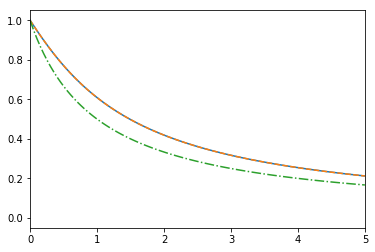

array(1.)

In [10]:
z = np.linspace(0,5,100)
plt.figure()
plt.plot(class_z,class_D,ls='-')
plt.plot(z,D_z(z),ls='--')
plt.plot(z,1/(1+z),ls='-.')
plt.xlim(0,5)
plt.show()
D_z(0)

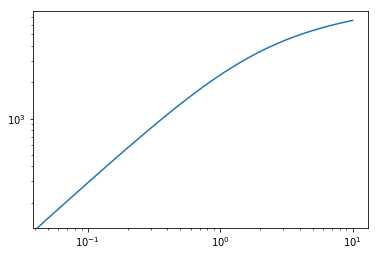

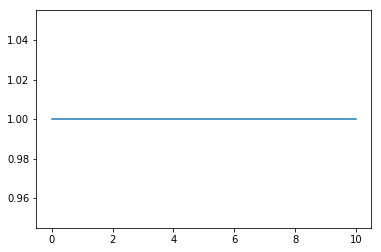

In [11]:
z=np.linspace(0.,10,200)
plt.figure()
plt.loglog(z,chi_z(z))
plt.show()
plt.figure()
plt.plot(z,D_z(z)/D_chi(chi_z(z)))
plt.show()
# plt.figure()
# plt.loglog(z,)
# plt.show()
# plt.figure()
# plt.loglog(z,z_chi(chi_z(z)))
# plt.show()

In [12]:
D_chi(chi_z(0.1))

array(0.94886829)

In [13]:
4./np.pi

1.2732395447351628

In [14]:
def set_kernel(chi_max):
    def kernel(chi):
        return (1.+z_chi(chi))*D_chi(chi)
    return kernel

In [15]:
W = set_kernel(chi_cmb)

In [16]:
ell_ = np.unique(ell)
nu_n_= np.unique(nu_n) 
print(nu_n_)
print(ell_)
print(np.unique(tt))
t_=np.unique(tt)
assert(np.all(t_==t1))
print(len(nu_n_),len(n),len(c_n),len(t_))
print(len(tt),len(I_))

[-1.9-27.94471j   -1.9-27.665263j  -1.9-27.385816j  -1.9-27.106369j
 -1.9-26.826921j  -1.9-26.547474j  -1.9-26.268027j  -1.9-25.98858j
 -1.9-25.709133j  -1.9-25.429686j  -1.9-25.150239j  -1.9-24.870792j
 -1.9-24.591345j  -1.9-24.311898j  -1.9-24.03245j   -1.9-23.753003j
 -1.9-23.473556j  -1.9-23.194109j  -1.9-22.914662j  -1.9-22.635215j
 -1.9-22.355768j  -1.9-22.076321j  -1.9-21.796874j  -1.9-21.517427j
 -1.9-21.237979j  -1.9-20.958532j  -1.9-20.679085j  -1.9-20.399638j
 -1.9-20.120191j  -1.9-19.840744j  -1.9-19.561297j  -1.9-19.28185j
 -1.9-19.002403j  -1.9-18.722956j  -1.9-18.443509j  -1.9-18.164061j
 -1.9-17.884614j  -1.9-17.605167j  -1.9-17.32572j   -1.9-17.046273j
 -1.9-16.766826j  -1.9-16.487379j  -1.9-16.207932j  -1.9-15.928485j
 -1.9-15.649038j  -1.9-15.36959j   -1.9-15.090143j  -1.9-14.810696j
 -1.9-14.531249j  -1.9-14.251802j  -1.9-13.972355j  -1.9-13.692908j
 -1.9-13.413461j  -1.9-13.134014j  -1.9-12.854567j  -1.9-12.575119j
 -1.9-12.295672j  -1.9-12.016225j  -1.9-11.736778j

In [17]:
nu=nu_n_

res=[]
m = 0
for ii,ll in enumerate(ell_):
    print(ii,ll)
    for t in t_:
        for r in t_:
            res+=[np.real(sum(I_[m:m+len(n)][0:-1]*c_n[0:-1]*2.*(chi_cmb*r)**(-nu[0:-1]))+I_[m:m+len(n)][-1]*c_n[-1]*(chi_cmb*r)**(-nu[-1]))]
        m+=len(n)
assert(m==len(I_))

0 2.0
1 3.0
2 4.0
3 5.0
4 6.0
5 7.0
6 8.0
7 9.0
8 10.0
9 11.0
10 12.0
11 13.0
12 14.0
13 15.0
14 16.0
15 17.0
16 18.0
17 19.0
18 20.0
19 21.0
20 22.0
21 23.0
22 24.0
23 25.0
24 26.0
25 27.0
26 28.0
27 29.0
28 30.0
29 31.0
30 32.0
31 33.0
32 34.0
33 35.0
34 36.0
35 37.0
36 38.0
37 39.0
38 40.0
39 41.0
40 42.0
41 43.0
42 44.0
43 45.0
44 46.0
45 47.0
46 48.0
47 49.0
48 50.0
49 51.0
50 52.0
51 53.0
52 54.0
53 55.0
54 56.0
55 57.0
56 58.0
57 59.0
58 60.0
59 61.0
60 62.0
61 63.0
62 64.0
63 65.0
64 66.0
65 67.0
66 68.0
67 69.0
68 70.0
69 71.0
70 72.0
71 73.0
72 74.0
73 75.0
74 76.0
75 77.0
76 78.0
77 79.0
78 80.0
79 81.0
80 82.0
81 83.0
82 84.0
83 85.0
84 86.0
85 87.0
86 88.0
87 89.0
88 90.0
89 91.0
90 92.0
91 93.0
92 94.0
93 95.0
94 96.0
95 97.0
96 98.0
97 99.0
98 100.0
99 110.0
100 120.0
101 130.0
102 140.0
103 150.0
104 160.0
105 170.0
106 180.0
107 190.0
108 200.0
109 210.0
110 220.0
111 230.0
112 240.0
113 250.0
114 260.0
115 270.0
116 280.0
117 290.0
118 300.0
119 310.0
120 320.0
121 33

2.0 30360568.908932503
2.0 18184451.572968997 36377611.691832855
3.0 12945727.438500192
3.0 5542645.522708462 11089003.698447965
4.0 6851035.829950866
4.0 2299766.735941309 4601498.012017889
5.0 4106656.91702848
5.0 1138648.5998701968 2278474.696290344
6.0 2671300.5654929113
6.0 632797.4396863717 1266360.7777372203
7.0 1841490.1045141844
7.0 381594.38333370676 763716.7269436052
8.0 1325820.0249984942
8.0 244585.2346544647 489550.5746746458
9.0 987349.6297815217
9.0 164360.7020032559 329004.46546406084
10.0 755476.2586048534
10.0 114705.63634308912 229627.85495083168
11.0 591050.9473080843
11.0 82568.62869066135 165306.69926032313
12.0 471076.7024677063
12.0 60987.13403268522 122109.314266137
13.0 381412.7972390397
13.0 46041.874333472755 92193.08934839796
14.0 313025.2531025333
14.0 35417.51272848337 70924.76055744557
15.0 259945.16443559874
15.0 27692.801122621604 55460.12034220572
16.0 218112.00687852447
16.0 21963.18801708367 43988.9015235632
17.0 184694.92875841013
17.0 17639.95948

410.0 2.008555956437595
410.0 0.01160421041025938 0.02378704074491564
420.0 1.803129693804936
420.0 0.010189360376834142 0.02089827723222821
430.0 1.6222323120608575
430.0 0.008970539678002492 0.018408617656423657
440.0 1.4625295459782652
440.0 0.007917373364160651 0.01625635500992216
450.0 1.3211955999300424
450.0 0.007004660706221925 0.014390276628807597
460.0 1.1958271263795917
460.0 0.006211485375207748 0.012767859880201014
470.0 1.0843729735778989
470.0 0.005520512732773829 0.011353846578282718
480.0 0.9850769408677921
480.0 0.004916980263187316 0.01011820742688976
490.0 0.8964306493843472
490.0 0.004388571542878778 0.009035876434834679
500.0 0.8171349482825295
500.0 0.00392480932979258 0.008085526042215107
510.0 0.7460676531645472
510.0 0.0035169616352437854 0.007249369979130383
520.0 0.6822569677423297
520.0 0.0031572792967942734 0.006511630800804038
530.0 0.6248591455631518
530.0 0.002839595230213202 0.005859731978094753
540.0 0.5731399372666434
540.0 0.0025583854119966875 0.00

1550.0 0.0035033258075119486
1550.0 5.508209618077782e-06 1.2072481377700726e-05
1560.0 0.003391435287344274
1560.0 5.295909240615624e-06 1.1614674821118497e-05
1570.0 0.0032837475480172857
1570.0 5.094011181735746e-06 1.117890783134004e-05
1580.0 0.003180082145662852
1580.0 4.900418907987536e-06 1.0760934691627796e-05
1590.0 0.0030802667318208725
1590.0 4.7156125632218635e-06 1.0361665312583181e-05
1600.0 0.0029841380823155345
1600.0 4.538801589777839e-06 9.97947096154877e-06
1610.0 0.0028915398170193895
1610.0 4.3696598277634375e-06 9.613653559629665e-06
1620.0 0.0028023236335237025
1620.0 4.207658088041277e-06 9.26311142555739e-06
1630.0 0.0027163483400626178
1630.0 4.0525936485529344e-06 8.927397860734475e-06
1640.0 0.002633478826108728
1640.0 3.903989931458921e-06 8.605520192683697e-06
1650.0 0.002553586452847728
1650.0 3.7616746235064023e-06 8.297096175173369e-06
1660.0 0.0024765487883037277
1660.0 3.6252338301589154e-06 8.001262224496039e-06
1670.0 0.0024022484159511096
1670.0 3

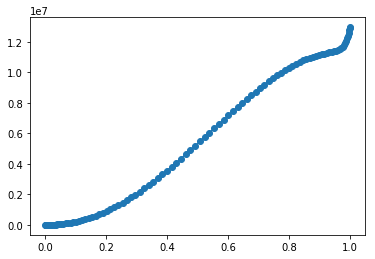

In [18]:
from scipy.integrate import simps, quadrature
from scipy.interpolate import interp1d
m=0
result=[]
for ii,ll in enumerate(ell_):
    res_=[]
    for t in t_:

        #for r in t_:
        integrand=(1.-t_*t)/t*(1.-t_)/t_*res[m:m+len(t_)]*W(t*t_*chi_cmb)*W(t*chi_cmb)


        m+=len(t_)
        #integrand[0] = 0.#+1j*0.

        res_+=[np.sum(w1*integrand)]#quadrature(integrand,min(t_),max(t_))[0]]
        if t==t_[-1]:
            print(ll,res_[-1])
    #print(res_)
        # for every n do r integral
    integrand = np.asarray(res_)

    if ll==3:
        plt.plot(t_,integrand,marker='o')
    #integrand[0] = 0.#+1j*0.
    print(ll,simps(integrand,t_), np.sum(w1*integrand))
    result+=[simps(integrand,t_)]#min(t_),max(t_))[0]]

In [19]:
# from scipy.integrate import simps, quadrature
# from scipy.interpolate import interp1d
# m=0
# result=[]
# for ii,ll in enumerate(ell_):
#     res_=[]
#     for t in t_:
        
#         #for r in t_:
#         integrand=W(t*t_*chi_cmb)*W(t*chi_cmb)*(1.-t_*t)/t*(1.-t_)/t_*res[m:m+len(t_)]

            
#         m+=len(t_)
#         #integrand[0] = 0.#+1j*0.

#         res_+=[np.sum(w1*integrand)]#quadrature(integrand,min(t_),max(t_))[0]]
#     #print(res_)
#         # for every n do r integral
#     integrand = np.asarray(res_)

#     if ll==3:
#         plt.plot(t_,integrand,marker='o')
#     #integrand[0] = 0.#+1j*0.
#     result+=[simps(integrand,t_)]#min(t_),max(t_))[0]]
    


In [20]:
# from scipy.integrate import simps, quadrature
# from scipy.interpolate import interp1d
# m=0
# result=[]
# for ii,ll in enumerate(ell_):
#     res_=[]
#     for t in t_:
        
#         #for r in t_:
#         integrand=W(t*t_*chi_cmb)*(1.-t_*t)*(1.-t_)/t_*res[m:m+len(t_)]

            
#         m+=len(t_)
#         integrand[0] = 0.#+1j*0.
#         #if ll==20:
#         #    plt.semilogx(t_,integrand)
#         integrand = interp1d(t_,integrand,kind='linear')
#         t_long = np.linspace(min(t_),max(t_),500)
#         res_+=[simps(integrand(t_long),t_long)]#quadrature(integrand,min(t_),max(t_))[0]]
#     #print(res_)
#         # for every n do r integral
#     integrand = np.asarray(res_)*W(t_*chi_cmb)/t_

    
#     integrand[0] = 0.#+1j*0.
#     integrand = interp1d(t_,integrand,kind='linear')
#     if ll==3:
#         plt.semilogx(t_long,integrand(t_long))
#     result+=[simps(integrand(t_long),t_long)]#min(t_),max(t_))[0]]
        

In [21]:
Cl=np.real(np.asarray(result))*4./np.pi**2*prefac**2/2.
print(ell_,Cl)

[   2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.
   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.
   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.
   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  110.  120.  130.  140.  150.  160.  170.  180.  190.
  200.  210.  220.  230.  240.  250.  260.  270.  280.  290.  300.  310.
  320.  330.  340.  350.  360.  370.  380.  390.  400.  410.  420.  430.
  440.  450.  460.  470.  480.  490.  500.  510.  520.  530.  540.  550.
  560.  570.  580.  590.  600.  610.  620.  630.  640.  650.  660.  670.
  680.  690.  700.  710.  720.  730.  740.  750.  7

(2, 500)

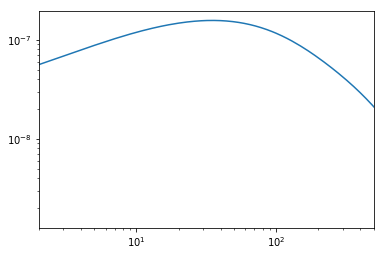

In [22]:
plt.figure()
plt.loglog(ell_,(ell_*(ell_+1.))**2*Cl/(2.*np.pi))
plt.xlim(2,500)

In [23]:
cosmo = Class()

cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
cosmo_dict['output']='lCl, tCl'
cosmo_dict['l_max_scalars']=2000
cosmo_dict['lensing']='yes'
cosmo_dict['l_switch_limber']=100
cosmo_dict['perturb_sampling_stepsize']=0.01

cosmo.set(cosmo_dict)
cosmo.compute()
cllen= cosmo.lensed_cl(lmax=1000)
ll = cllen['ell']
clpp = cllen['pp']

In [24]:
data=np.loadtxt(path+'Cell_marko.dat')
cl = data[:,1]

ls = data[:,0]


ValueError: x and y must have same first dimension, but have shapes (1,) and (1001,)

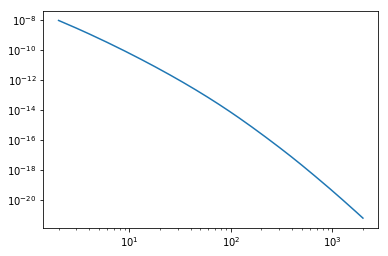

In [118]:
plt.figure()
plt.loglog(ell_,Cl,label='us')
plt.loglog(ll,clpp,label='CLASS')
plt.loglog(ls,cl,label='Marko')
plt.xlim(2,1000)
plt.ylim(1e-15,1e-7)
plt.legend()


In [ ]:
Cl

In [ ]:
cosmo = Class()

cosmo_dict={'h': h,
'omega_b' : omega_b,
'omega_cdm': omega_cdm,
'A_s'    : A0,
'n_s'    : ns,
'k_pivot' : 0.05}
cosmo_dict['output']='lCl, tCl, mPk'
cosmo_dict['l_max_scalars']=2000
cosmo_dict['lensing']='yes'
cosmo_dict['l_switch_limber']=1

cosmo.set(cosmo_dict)
cosmo.compute()
cllen= cosmo.lensed_cl(lmax=1000)
ll2 = cllen['ell']
clpp2 = cllen['pp']

cosmo.sigma8()

In [ ]:
plt.figure()#
plt.semilogx(ell_,Cl/np.interp(ell_,ll,clpp), label='our result over CLASS no Limber')
plt.semilogx(ell_,Cl/np.interp(ell_,ll,clpp)/1.13, label='our result/1.13 over CLASS no Limber')
#plt.semilogx(ell_,np.interp(ell_,ls,cl)/Cl)
plt.semilogx(ls,cl/np.interp(ls,ll,clpp), label='Markos result over CLASS no Limber')
#plt.axhline(1,color='black')
plt.ylim(0.8,1.2)
plt.grid()
plt.legend()

In [ ]:
import camb
from camb import model, initialpower
print('CAMB version: %s '%camb.__version__)

In [119]:
x = y = z = np.arange(0.0,5.0,1.0)
np.savetxt('test.out', (x,y,z))
type(ll)

OSError: [Errno 23] Too many open files in system: 'test.out'

In [120]:
np.savetxt('class_ouput.out',X=(ll2,clpp,clpp2))



OSError: [Errno 23] Too many open files in system: 'class_ouput.out'

ValueError: x and y must have same first dimension, but have shapes (1,) and (1001,)

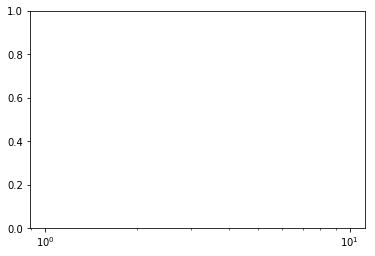

In [121]:
plt.semilogx(ll,clpp2/clpp-1, label='CLASS Limber over CLASS no Limber')

In [122]:
#ratio class over camb
ll,clpp,clpp2 = np.loadtxt('class_ouput.out')
c_ell,cl_limber,cl_limber2,cl_camb = np.loadtxt('camb_cls.out')
clpp=np.interp(c_ell,ll,(ll*(ll+1.))**2*clpp/2./np.pi)
clpp2=np.interp(c_ell,ll,(ll*(ll+1.))**2*clpp2/2./np.pi)
plt.semilogx(c_ell,clpp/cl_camb-1, label='CLASS over CAMB no Limber -1')
plt.ylim(-0.1,0.1)
plt.grid()

OSError: [Errno 23] Too many open files in system: 'class_ouput.out'

In [123]:
def cmb_kernel(chi):
    return D_chi(chi)*(1.+z_chi(chi))*(chi_cmb-chi)/chi_cmb/chi

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.07240815e+02 5.85890048e+02
 8.42687933e+02 1.21131429e+03 1.73915884e+03 2.49156929e+03
 3.55528429e+03 5.04045409e+03 7.07240966e+03 9.76205855e+03
 1.31518242e+04 1.71045771e+04 2.11424719e+04 2.42813391e+04
 2.49685296e+04 2.17737736e+04 1.58071185e+04 1.14653914e+04
 7.88827304e+03 4.46692041e+03 2.36493028e+03 1.25014560e+03
 5.89889068e+02 2.69918910e+02 1.18363016e+02 5.00650628e+01
 2.05960307e+01 8.26811134e+00 3.25044742e+00 1.25703804e+00
 4.77907014e-01 1.79802604e-01 6.66311486e-02 2.45380898e-02
 8.91225148e-03 3.21667043e-03 1.14436251e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


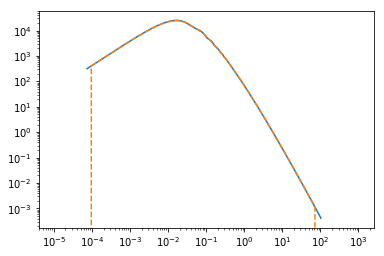

In [108]:
data=np.loadtxt('class_pk.dat')
kh = data[:,0]
Pkh = data[:,1]
plt.figure()
plt.loglog(kh,Pkh)

pki=interp1d(kh,Pkh,bounds_error=False, fill_value=0.)

kk = np.logspace(-5,3)
plt.loglog(kk,pki(kk),ls='--')
print(pki(kk))

In [114]:
chis = np.linspace(50,chi_cmb,1000)

clpp_=[]
for ll in ell_:
    print(ll)
    integrand =[]
    for chi_ in chis:
        k_ = ll/chi_
        pk = pki(k_)/k_**4 #p_psi
        integrand+=[pk*cmb_kernel(chi_)**2/chi_**2]
    clpp_+=[simps(integrand,chis)]

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0
410.0
420.0
430.0
440.0
450.0
460.0
470.0
480.0
490.0
500.0
510.0
520.0
530.0
540.0
550.0
560.0
570.0
580.0
590.0
600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0
710.0
720.0
730.0
740.0
750.0
760.0
770.0
780.0
790.0
800.0
810.0
820.0
830.0
840.0
850.0
860.0
870.0
880.0
890.0
900.0
910.0
920.0
930.0
940.0
950.0
96

In [115]:
clpp_=np.array(clpp_)*prefac**2*2.

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.